In [1]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize

import Bargaining as brg

do_cpp = True
do_compile = False

In [2]:
# solve model
T = 10
model_cpp = brg.HouseholdModelClass(par={'T':T,'phi_w':0.2,'phi_m':0.2,'sigma_love':0.1,'do_cpp':True})
model_cpp.link_to_cpp(force_compile=do_compile,do_print=False)
%time model_cpp.solve()

model = brg.HouseholdModelClass(par={'T':T,'phi_w':0.2,'phi_m':0.2,'sigma_love':0.1,'do_cpp':False})
%time model.solve()

Wall time: 2.55 s
Wall time: 2min 11s


0.03922854459225755


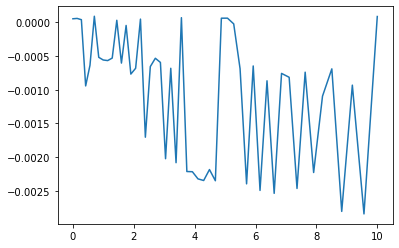

In [3]:
t = 0
val = 'C_pub_couple'

iP = 10 #10
iL = 5

diff = getattr(model.sol,val) - getattr(model_cpp.sol,val)
plt.plot(model.par.grid_A,diff[t,iP,iL]);
print(np.max(np.abs(diff.ravel())))